# EDA


In [0]:
# Plotly config
import IPython

def configure_plotly_browser_state():
    display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))


IPython.get_ipython().events.register('pre_run_cell', configure_plotly_browser_state)

In [14]:
import os

In [15]:
from pathlib import Path

ROOT = "ICLR/"

TRAIN_IMAGES = list(Path(ROOT).glob("train/train/*/*"))
TRAIN_IMAGES = list(filter(lambda x: not x.name.startswith("."), TRAIN_IMAGES))
print("Number of train images:", len(TRAIN_IMAGES))

TEST_IMAGES = list(Path(ROOT).glob("test/test/*"))
TEST_IMAGES = list(filter(lambda x: not x.name.startswith("."), TEST_IMAGES))
print("Number of test images:", len(TEST_IMAGES))

Number of train images: 876
Number of test images: 610


We have very few images to train so Dat Augmentation is necessary. Using pretrained models will be usefull. K-fold CV can be used as well.

In [16]:
CLASSES = os.listdir(os.path.join(ROOT, 'train/train/'))
print("Number of classes: ", len(CLASSES))
CLASSES

Number of classes:  3


['healthy_wheat', 'leaf_rust', 'stem_rust']

In [17]:
trainDataDbn = {}
for item in CLASSES:
    print("Number of images in ", item, len(os.listdir(os.path.join(ROOT, 'train/train/'+item))))
    trainDataDbn[item] = len(os.listdir(os.path.join(ROOT, 'train/train/'+item)))

Number of images in  healthy_wheat 142
Number of images in  leaf_rust 358
Number of images in  stem_rust 376


In [20]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [21]:
fig = {
  "data": [
    {
      "values": list(trainDataDbn.values()),
      "labels": list(trainDataDbn.keys()),
#       "domain": {"x": [0, .5]},
#      "name": "Training Data Distribution",
#       "hoverinfo":"label+percent+name",
      "hoverinfo":"label+percent",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Training Data Distribution",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Images",
                "x": 1,
                "y": 1
            },
        ]
    }
}
iplot(fig)

The data seems imbalanced so stratified crossvalidation will be a better choice.

In [24]:
import matplotlib.pyplot as plt
import numpy as np

Train Images


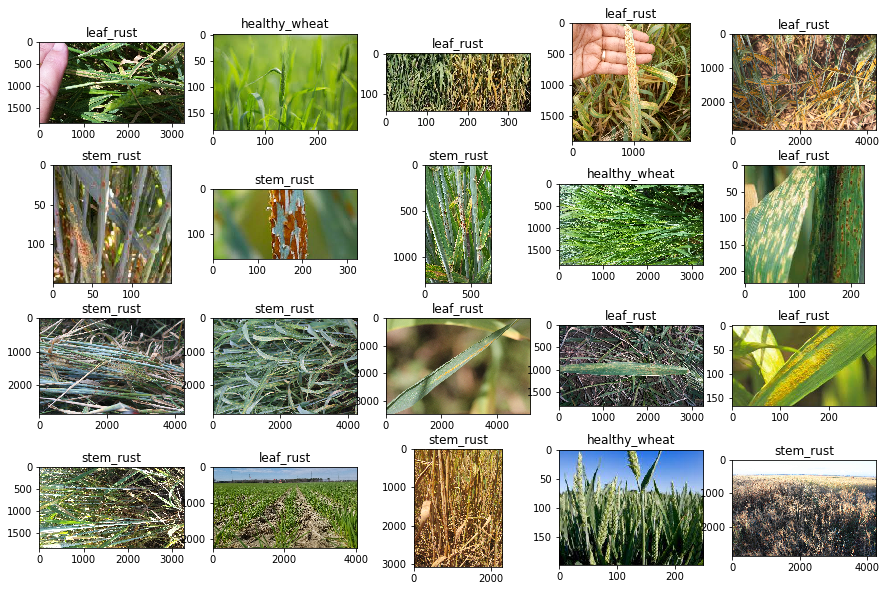

In [25]:
print("Train Images")
fig=plt.figure(figsize=(15, 10))
columns = 5; rows = 4
for i in range(0, columns*rows):
    idx = np.random.randint(0, len(TRAIN_IMAGES))
    fig.add_subplot(rows,columns,i+1)
    plt.imshow(plt.imread(str(TRAIN_IMAGES[idx])))
    plt.title(TRAIN_IMAGES[idx].parts[-2])

Train Images


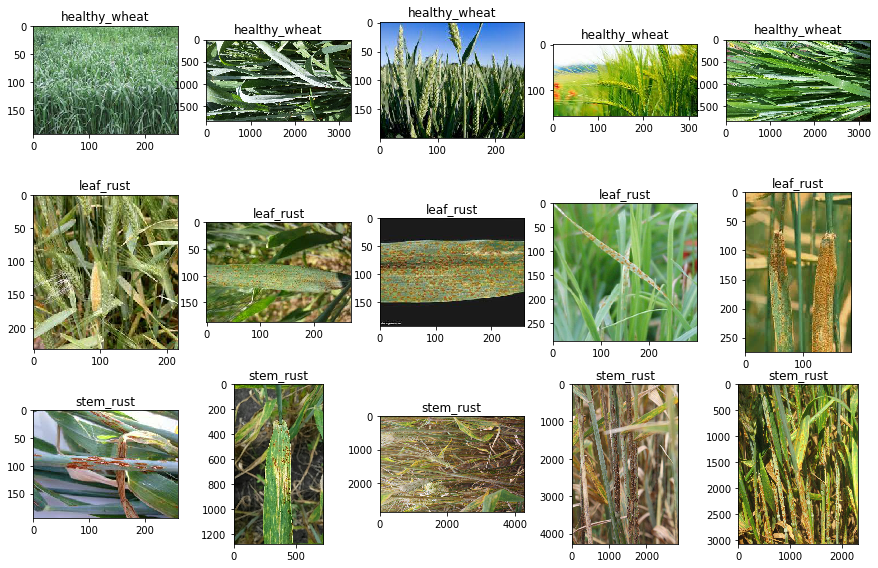

In [26]:
print("Train Images")
fig=plt.figure(figsize=(15, 10))
columns = 5; rows = len(CLASSES)
subPltNo = 0
for title in CLASSES:
    count = 0
    run = True
    while run:
        idx = np.random.randint(0, len(TRAIN_IMAGES))
        if TRAIN_IMAGES[idx].parts[-2] == title:
            count += 1
            subPltNo += 1
            fig.add_subplot(rows,columns,subPltNo)
            plt.imshow(plt.imread(str(TRAIN_IMAGES[idx])))
            plt.title(title)
        if count == columns:
            run = False

Test Images


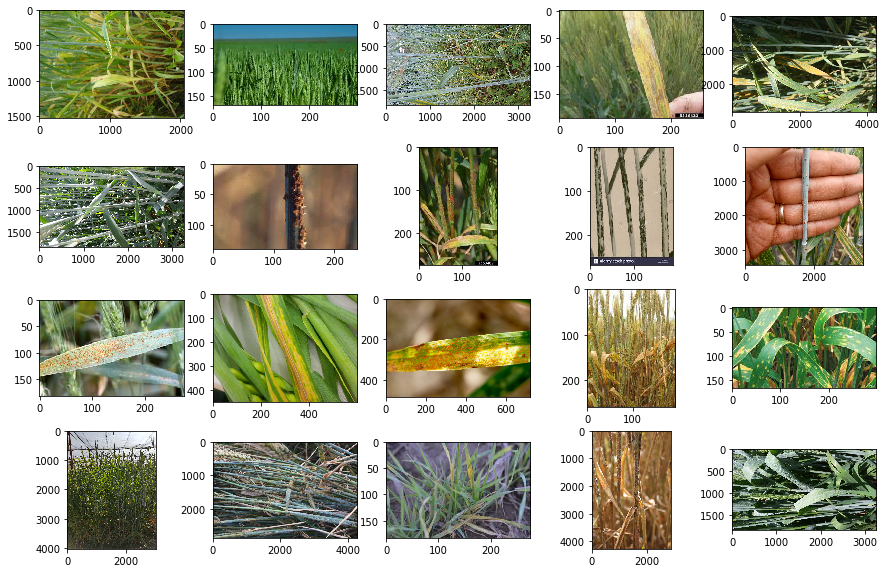

In [27]:
print("Test Images")
fig=plt.figure(figsize=(15, 10))
columns = 5; rows = 4
for i in range(0, columns*rows):
    idx = np.random.randint(0, len(TEST_IMAGES))
    fig.add_subplot(rows,columns,i+1)
    plt.imshow(plt.imread(str(TEST_IMAGES[idx])))

Dataset definetely has some noise. Images are of different shapes and some are rotated. Data Augmentations (including VerticalFlip=True) definetely will help. Looks like the images are gathered using the search results from dudckduckgo/google or similar search engines.

## Conclusion
- Data Augmentation
- Transfer Learning
- StratifiedKFold CV
